In [2]:
import sys
sys.path.insert(1, "/home/odyssey/mmk_smoke_detection/")

In [3]:
%matplotlib inline  
import albumentations as A
from PIL import Image, ImageDraw
import numpy as np
import glob
import os
import random
import matplotlib
from matplotlib import pyplot as plt
from IPython.display import display, clear_output, Image as IImage
import cv2

matplotlib.use('TkAgg')

In [4]:
from dataset_preparator.preparator import DatasetDirectoryController, LABELS

In [4]:
PATH_TO_DATASET = "/home/odyssey/mmk_smoke_detection/augmentation/merged_ready_dataset"

In [5]:
PATH_TO_OLD_DATASET = "/home/odyssey/mmk_smoke_detection/dataset_preparator/filtered_dataset"
dir_controller = DatasetDirectoryController(PATH_TO_OLD_DATASET)
dir_controller.prepare_directories()

('background', 'emission', 'fire', 'machine')


In [7]:
dir_controller.get_directory_for_label_idx(0)

'/home/odyssey/mmk_smoke_detection/dataset_preparator/filtered_dataset/background'

In [5]:
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.ShiftScaleRotate(
        rotate_limit=30,
        p=0.8,
        scale_limit=0.2
    ),      
#     A.CenterCrop(p=0.2, height=90, width=90),
#     A.SmallestMaxSize(p=1, interpolation=2, max_size=224),
#     A.GridDistortion(
#         num_steps=8,
#         distort_limit=0.2,
#         p=0.4
#     ),
    A.OneOf(
        [
            A.HueSaturationValue(p=0.2),
            A.RandomBrightnessContrast(p=0.5)
        ],
        p=0.5
    ),
    A.Blur(
        blur_limit=3,
        p=0.2
    ),
#     A.CoarseDropout(
#         min_holes=10,
#         max_holes=30,
#         min_height=5,
#         min_width=5,
#         max_height=15,
#         max_width=15,
#         p=0.5
#     ),
])

# default_transform = A.SmallestMaxSize(p=1, interpolation=2, max_size=224)
default_transform = A.CenterCrop(p=1, height=60, width=120)


In [6]:
test_transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    # A.CLAHE(p=0.5),
    A.CenterCrop(
        p=0.1,
        height=50,
        width=90
    ),
    A.ShiftScaleRotate(
        rotate_limit=40,
        p=0.8,
        scale_limit=0.0,
    ),      
    A.RandomBrightnessContrast(p=0.5),
    A.Blur(
        blur_limit=2,
        p=0.2
    ),
    A.CoarseDropout(
        min_holes=10,
        max_holes=20,
        min_height=5,
        min_width=5,
        max_height=5,
        max_width=5,
        p=0.3
    ),
])

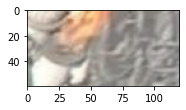

In [191]:
test_dataset_path = "line_dataset/"
test_files = glob.glob(
    os.path.join(
        test_dataset_path,
        "fire",
        "*.jpg"
    )
)
rnd_file = random.choice(test_files)
rnd_test_img = np.array(Image.open(rnd_file))

fig = plt.figure()    _labels_to_handle: Tuple[int]

ax = fig.add_subplot(1,2,1)
ax.imshow(rnd_test_img)

display(fig)

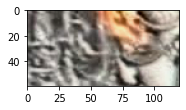

In [202]:
auged_img = test_transform(image=rnd_test_img)["image"]

fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.imshow(auged_img)

display(fig)

In [20]:
# import random
# import shutil
# import tqdm
# from typing import Tuple, Union, List
#
# class DataAugmentator:
#     _target_count: List[int]
#     _dircon: DatasetDirectoryController
#     _result_dircon: DatasetDirectoryController
#
# #     _transform = transform
#     _transform = test_transform
#     _default_transform = default_transform
#
#     _is_standalone: bool
#
#     def __init__(
#         self,
#         dataset_dir: str,
#         result_dir: str,
#         target_count: Union[int, List[int]]
#     ):
#         self._target_count = target_count if isinstance(target_count, list) else [target_count for _ in range(4)]
#
#         self._dircon = DatasetDirectoryController(dataset_dir)
#         self._dircon.prepare_directories()
#         if os.path.exists(result_dir):
#             shutil.rmtree(result_dir)    _labels_to_handle: Tuple[int]

#         os.makedirs(result_dir)
#         self._result_dircon = DatasetDirectoryController(result_dir)
#         self._result_dircon.prepare_directories()
#
#     @staticmethod
#     def _get_file_name_and_extension(file_path) -> Tuple[str, str]:
#         return os.path.splitext(
#             os.path.basename(file_path)
#         )
#
#     def _aug(
#         self,
#         label_idx: int,
#         img: Image.Image,
#         aug_num: int,
#         origin_file_name: str,
#         origin_file_extension: str,
#         is_default: bool = False,
#     ):
#         tr = default_transform if is_default else transform
#         auged_img = tr(image=img)["image"]
#         auged_img_name = os.path.join(
#             self._result_dircon.get_directory_for_label_idx(label_idx=label_idx),
#             f"{origin_file_name}_{aug_num}{origin_file_extension}"
#         )
#         Image.fromarray(auged_img).save(auged_img_name)
#
#     def _load_and_aug(
#         self,
#         label_idx: int,
#         file_path: str,
#         aug_degree: int,
#         extra_aug_prob: float
#     ):
#         img_name, img_extension = self._get_file_name_and_extension(file_path)
#         img = np.array(Image.open(file_path))
#         if aug_degree == 0 and extra_aug_prob != 0:
#             if random.random() <= extra_aug_prob:
#                 self._aug(label_idx, img, 0, img_name, img_extension, is_default=True)
#             return
#         self._aug(label_idx, img, 0, img_name, img_extension, is_default=True)
# #         shutil.copy2(file_path, self._result_dircon.get_directory_for_label_idx(label_idx))
#
#         for aug_num in range(1, aug_degree):
#             self._aug(label_idx, img, aug_num, img_name, img_extension)
#
#         rand_prob = random.random()
#         if rand_prob <= extra_aug_prob:
#             self._aug(label_idx, img, aug_degree, img_name, img_extension)
#
#     def augment_label(
#         self,
#         label_idx: int,
#         target_count: int
#     ):
#         label_dir = self._dircon.get_directory_for_label_idx(label_idx)
#         label_files = glob.glob(os.path.join(label_dir, "*"))
#         files_len = len(label_files)
#         """
#         count - к скольким изображениям я хочу применять аугментацию
#         degree - сколько раз аугментировать изображение
#         prob - вероятность применить доп аугментацию к каждому выбранному изображению
#         """
#         if target_count == 0:
#             degree, prob = 0, 0
#         elif target_count <= files_len:
#             degree = 0
#             prob = target_count / files_len
#         else:
#             degree = target_count // files_len
#             prob = (target_count % files_len) / files_len
#
#         print("TARGET COUNT:", target_count, "FILES LENGTH:", files_len)
#         print("DEGREE:", degree, "EXTRA PROB:", prob)
#         shuffled_idx = list(range(files_len))
#         random.shuffle(shuffled_idx)
# #         shuffled_idx = shuffled_idx[:10]
#         for ridx in tqdm.tqdm(shuffled_idx):
#             r_file = label_files[ridx]
#             self._load_and_aug(
#                 label_idx=label_idx,
#                 file_path=r_file,
#                 aug_degree=degree,
#                 extra_aug_prob=prob    _labels_to_handle: Tuple[int]

#             )
#
#     def aug_all_labels(
#         self
#     ):
#         print("SOURCE STATS", self._dircon.stats)
#         for label_idx in range(4):
#             mentat.augment_label(label_idx, self._target_count[label_idx])
#         print("DESTINATION STATS", self._result_dircon.stats)



In [7]:
import random
import shutil
import tqdm
from typing import Tuple, Union, List, Callable

class ExpDataAugmentator:
    MIN_AUG_COUNT = 1
    EXTRA_AUG_COUNT = 3

    _target_degrees: List[Union[float, int]]
    _dircon: DatasetDirectoryController
    _result_dircon: DatasetDirectoryController

#     _transform = transform
    _transform = test_transform
    _default_transform = default_transform

    _is_standalone: bool

    def __init__(
        self,
        dataset_dir: str,
        result_dir: str,
        target_degrees: List[Union[float, int]],
        src_labels: List[int] = LABELS,
        dst_labels: List[int] = LABELS,
        label_mapper: Callable = lambda x: x
    ):
        print(src_labels, dst_labels)
        self._target_degrees = target_degrees

        self._dircon = DatasetDirectoryController(
            dataset_main_dir=dataset_dir,
            labels=src_labels,
        )
        self._dircon.prepare_directories()
        if os.path.exists(result_dir):
            shutil.rmtree(result_dir)
        os.makedirs(result_dir)
        self._result_dircon = DatasetDirectoryController(
            result_dir,
            labels=dst_labels,
            label_mapper=label_mapper
        )
        self._result_dircon.prepare_directories()

    @staticmethod
    def _get_file_name_and_extension(file_path) -> Tuple[str, str]:
        return os.path.splitext(
            os.path.basename(file_path)
        )

    def _aug(
        self,
        label_idx: int,
        img: Image.Image,
        aug_num: int,
        origin_file_name: str,
        origin_file_extension: str,
        is_default: bool = False,
    ):
        tr = default_transform if is_default else transform
        auged_img = tr(image=img)["image"]
        auged_img_name = os.path.join(
            self._result_dircon.get_directory_for_label_idx(label_idx=label_idx),
            f"{origin_file_name}_{aug_num}{origin_file_extension}"
        )
        Image.fromarray(auged_img).save(auged_img_name)

    def _load_and_aug(
        self,
        label_idx: int,
        file_path: str,
        aug_degree: Union[int, float]
    ):
        img_name, img_extension = self._get_file_name_and_extension(file_path)
        img = np.array(Image.open(file_path))
        if isinstance(aug_degree, float):
            if random.random() <= aug_degree:
                self._aug(label_idx, img, 0, img_name, img_extension, is_default=True)
            return

        self._aug(label_idx, img, 0, img_name, img_extension, is_default=True)
        for aug_num in range(1, aug_degree):
            self._aug(label_idx, img, aug_num, img_name, img_extension)

    def augment_label(
        self,
        label_idx: int,
        target_degree: Union[float, int]
    ):
        label_dir = self._dircon.get_directory_for_label_idx(label_idx)
        label_files = glob.glob(os.path.join(label_dir, "*"))
        files_len = len(label_files)
        print("TARGET DEGREE:", target_degree, "FILES LENGTH:", int(files_len))
        shuffled_idx = list(range(files_len))
        random.shuffle(shuffled_idx)

        for ridx in tqdm.tqdm(shuffled_idx):
            if target_degree == 0 or (target_degree, float):
                degree = target_degree
            else:
                degree = random.randint(self.MIN_AUG_COUNT, target_degree + self.EXTRA_AUG_COUNT + 1)

            r_file = label_files[ridx]
            self._load_and_aug(
                label_idx=label_idx,
                file_path=r_file,
                aug_degree=degree,
            )
            files_len += degree

    def aug_all_labels(
        self
    ):
        print("SOURCE STATS", self._dircon.stats)
        for label_idx, label in enumerate(self._dircon.labels):
            mentat.augment_label(label_idx, self._target_degrees[label_idx])
        print("DESTINATION STATS", self._result_dircon.stats)

In [9]:
! cp -r ../dataset_preparator/merged_ready_dataset_2 .
! ls

binary_splitted_medium_aug_dataset     medium_ready_dataset
binary_splitted_small_aug_dataset      merged_ready_dataset
binary_splitted_small_aug_dataset_2_2  merged_ready_dataset_2
binary_validation		       merged_ready_dataset_copy
dataset_aug.ipynb		       merged_small_aug_dataset_2
dataset_splitter.ipynb		       ready_dataset
line_binary_dataset		       small_aug_dataset
line_binary_extra_small_aug_dataset    small_aug_dataset_2
line_binary_extra_small_aug_dataset_2  splitted_line_binary_dataset
line_binary_small_aug_dataset	       splitted_line_dataset
line_dataset			       splitted_line_small_aug_dataset
line_dataset_2			       splitted_medium_aug_dataset
line_small_aug_dataset		       splitted_small_aug_dataset
line_val			       three_merged_ready_dataset_copy
medium_aug_dataset		       three_small_aug_dataset
medium_aug_dataset_2		       three_validation


In [15]:
# splitted_line_binary_dataset_2
PATH_TO_DATASET = "splitted_line_binary_dataset_2"
PATH_TO_RESULT_DATASET = "line_binary_small_aug_dataset_extended"

def mapper(label_idx: int) -> int:
    if label_idx == 1:
        return 1
    return 0

if os.path.exists(PATH_TO_RESULT_DATASET):
    shutil.rmtree(PATH_TO_RESULT_DATASET)

mentat = ExpDataAugmentator(
    dataset_dir=f"{PATH_TO_DATASET}/train",
    result_dir=f"{PATH_TO_RESULT_DATASET}/train",
    target_degrees=[1, 2],
    src_labels=LABELS[:2],
    dst_labels=LABELS[:2],
    label_mapper=mapper
)
mentat.aug_all_labels()

os.system(f"cp -r {PATH_TO_DATASET}/test {PATH_TO_RESULT_DATASET}")

('background', 'emission') ('background', 'emission')
('background', 'emission')
('background', 'emission')
SOURCE STATS {'background': 10163, 'emission': 5248}
TARGET DEGREE: 1 FILES LENGTH: 10163


100%|██████████| 10163/10163 [00:04<00:00, 2187.84it/s]


TARGET DEGREE: 2 FILES LENGTH: 5248


100%|██████████| 5248/5248 [00:04<00:00, 1071.05it/s]

DESTINATION STATS {'background': 10163, 'emission': 10496}


0

In [16]:
# splitted_line_binary_dataset_2
PATH_TO_DATASET = "splitted_line_binary_dataset_2"
PATH_TO_RESULT_DATASET = "line_binary_medium_aug_dataset_extended"

def mapper(label_idx: int) -> int:
    if label_idx == 1:
        return 1
    return 0

if os.path.exists(PATH_TO_RESULT_DATASET):
    shutil.rmtree(PATH_TO_RESULT_DATASET)

mentat = ExpDataAugmentator(
    dataset_dir=f"{PATH_TO_DATASET}/train",
    result_dir=f"{PATH_TO_RESULT_DATASET}/train",
    target_degrees=[2, 4],
    src_labels=LABELS[:2],
    dst_labels=LABELS[:2],
    label_mapper=mapper
)
mentat.aug_all_labels()

os.system(f"cp -r {PATH_TO_DATASET}/test {PATH_TO_RESULT_DATASET}")

('background', 'emission') ('background', 'emission')
('background', 'emission')
('background', 'emission')
SOURCE STATS {'background': 10163, 'emission': 5248}
TARGET DEGREE: 2 FILES LENGTH: 10163


100%|██████████| 10163/10163 [00:09<00:00, 1055.35it/s]


TARGET DEGREE: 4 FILES LENGTH: 5248


100%|██████████| 5248/5248 [00:09<00:00, 535.59it/s]

DESTINATION STATS {'background': 20326, 'emission': 20992}


0

In [18]:
# splitted_line_binary_dataset_2
PATH_TO_DATASET = "splitted_line_binary_dataset_2"
PATH_TO_RESULT_DATASET = "line_binary_large_aug_dataset_extended"

def mapper(label_idx: int) -> int:
    if label_idx == 1:
        return 1
    return 0

if os.path.exists(PATH_TO_RESULT_DATASET):
    shutil.rmtree(PATH_TO_RESULT_DATASET)

mentat = ExpDataAugmentator(
    dataset_dir=f"{PATH_TO_DATASET}/train",
    result_dir=f"{PATH_TO_RESULT_DATASET}/train",
    target_degrees=[4, 8],
    src_labels=LABELS[:2],
    dst_labels=LABELS[:2],
    label_mapper=mapper
)
mentat.aug_all_labels()

os.system(f"cp -r {PATH_TO_DATASET}/test {PATH_TO_RESULT_DATASET}")

('background', 'emission') ('background', 'emission')
('background', 'emission')
('background', 'emission')
SOURCE STATS {'background': 10163, 'emission': 5248}
TARGET DEGREE: 4 FILES LENGTH: 10163


100%|██████████| 10163/10163 [00:18<00:00, 539.11it/s]


TARGET DEGREE: 8 FILES LENGTH: 5248


100%|██████████| 5248/5248 [00:20<00:00, 259.42it/s]


DESTINATION STATS {'background': 40652, 'emission': 41984}


0

In [19]:
# splitted_line_binary_dataset_2
PATH_TO_DATASET = "splitted_line_binary_dataset_2"
PATH_TO_RESULT_DATASET = "line_binary_extra_large_aug_dataset_extended"

def mapper(label_idx: int) -> int:
    if label_idx == 1:
        return 1
    return 0

if os.path.exists(PATH_TO_RESULT_DATASET):
    shutil.rmtree(PATH_TO_RESULT_DATASET)

mentat = ExpDataAugmentator(
    dataset_dir=f"{PATH_TO_DATASET}/train",
    result_dir=f"{PATH_TO_RESULT_DATASET}/train",
    target_degrees=[8, 16],
    src_labels=LABELS[:2],
    dst_labels=LABELS[:2],
    label_mapper=mapper
)
mentat.aug_all_labels()

os.system(f"cp -r {PATH_TO_DATASET}/test {PATH_TO_RESULT_DATASET}")

('background', 'emission') ('background', 'emission')
('background', 'emission')
('background', 'emission')
SOURCE STATS {'background': 10163, 'emission': 5248}
TARGET DEGREE: 8 FILES LENGTH: 10163


100%|██████████| 10163/10163 [00:47<00:00, 216.17it/s]


TARGET DEGREE: 16 FILES LENGTH: 5248


100%|██████████| 5248/5248 [00:48<00:00, 107.90it/s]


DESTINATION STATS {'background': 81304, 'emission': 83968}


0

In [11]:
# merged_ready_dataset_2
PATH_TO_DATASET = "merged_ready_dataset_2"

mentat = ExpDataAugmentator(
    dataset_dir=PATH_TO_DATASET,
    result_dir="line_binary_dataset_2/",
    target_degrees=[1, 1, 4500/13820, 1],
    src_labels=LABELS,
    dst_labels=LABELS[:2],
    label_mapper=lambda label_idx: label_idx if label_idx == 1 else 0
)
mentat.aug_all_labels()

('background', 'emission', 'fire', 'machine') ('background', 'emission')
('background', 'emission', 'fire', 'machine')
('background', 'emission')
SOURCE STATS {'background': 4700, 'emission': 5509, 'fire': 13816, 'machine': 1470}
TARGET DEGREE: 1 FILES LENGTH: 4700


100%|██████████| 4700/4700 [00:02<00:00, 1912.12it/s]


TARGET DEGREE: 1 FILES LENGTH: 5509


100%|██████████| 5509/5509 [00:02<00:00, 1880.44it/s]


TARGET DEGREE: 0.3256150506512301 FILES LENGTH: 13816


100%|██████████| 13816/13816 [00:04<00:00, 2895.83it/s]


TARGET DEGREE: 1 FILES LENGTH: 1470


100%|██████████| 1470/1470 [00:00<00:00, 1908.15it/s]

DESTINATION STATS {'background': 10717, 'emission': 5509}


In [22]:
PATH_TO_DATASET = "splitted_line_binary_dataset"
PATH_TO_RESULT_DATASET = "line_binary_extra_small_aug_dataset_2"

def mapper(label_idx: int) -> int:
    if label_idx == 1:
        return 1
    return 0

if os.path.exists(PATH_TO_RESULT_DATASET):
    shutil.rmtree(PATH_TO_RESULT_DATASET)

mentat = ExpDataAugmentator(
    dataset_dir=f"{PATH_TO_DATASET}/train",
    result_dir=f"{PATH_TO_RESULT_DATASET}/train",
    target_degrees=[2, 5],
    src_labels=LABELS[:2],
    dst_labels=LABELS[:2],
    label_mapper=mapper
)
mentat.aug_all_labels()

os.system(f"cp -r {PATH_TO_DATASET}/test {PATH_TO_RESULT_DATASET}")

SOURCE STATS {'background': 10661, 'emission': 4288}
TARGET DEGREE: 2 FILES LENGTH: 10661


100%|██████████| 10661/10661 [00:14<00:00, 744.13it/s]


TARGET DEGREE: 5 FILES LENGTH: 4288


100%|██████████| 4288/4288 [00:12<00:00, 337.09it/s]


DESTINATION STATS {'background': 21322, 'emission': 21440}


0

In [ ]:
! rm -r merged_ready_dataset_3
! mkdir merged_ready_dataset_3
! cp -r merged_ready_dataset_2/* merged_ready_dataset_3/
! ls merged_ready_dataset_3
! rm -r merged_ready_dataset_3/emission
! mv merged_ready_dataset_3/machine/ merged_ready_dataset_3/background
! ls merged_ready_dataset_3

In [20]:
PATH_TO_DATASET = "splitted_line_binary_dataset"
PATH_TO_RESULT_DATASET = "line_binary_extra_small_aug_dataset"

def mapper(label_idx: int) -> int:
    if label_idx == 1:
        return 1
    return 0

if os.path.exists(PATH_TO_RESULT_DATASET):
    shutil.rmtree(PATH_TO_RESULT_DATASET)

mentat = ExpDataAugmentator(
    dataset_dir=f"{PATH_TO_DATASET}/train",
    result_dir=f"{PATH_TO_RESULT_DATASET}/train",
    target_degrees=[1, 3],
    src_labels=LABELS[:2],
    dst_labels=LABELS[:2],
    label_mapper=mapper
)
mentat.aug_all_labels()

os.system(f"cp -r {PATH_TO_DATASET}/test {PATH_TO_RESULT_DATASET}")

SOURCE STATS {'background': 10661, 'emission': 4288}
TARGET DEGREE: 1 FILES LENGTH: 10661


100%|██████████| 10661/10661 [00:05<00:00, 1894.08it/s]


TARGET DEGREE: 3 FILES LENGTH: 4288


100%|██████████| 4288/4288 [00:07<00:00, 610.92it/s]

DESTINATION STATS {'background': 10661, 'emission': 12864}


0

In [13]:
PATH_TO_DATASET = "merged_ready_dataset_2"

mentat = ExpDataAugmentator(
    dataset_dir=PATH_TO_DATASET,
    result_dir="line_fire_binary_dataset/",
    target_degrees=[1, 1, 1, 1],
    src_labels=LABELS,
    dst_labels=LABELS[:3],
    label_mapper=lambda label_idx: label_idx % 3
)
mentat.aug_all_labels()

('background', 'emission', 'fire', 'machine') ('background', 'emission', 'fire')
('background', 'emission', 'fire', 'machine')
('background', 'emission', 'fire')
SOURCE STATS {'background': 4700, 'emission': 5509, 'fire': 13816, 'machine': 1470}
TARGET DEGREE: 1 FILES LENGTH: 4700


100%|██████████| 4700/4700 [00:03<00:00, 1307.04it/s]


TARGET DEGREE: 1 FILES LENGTH: 5509


100%|██████████| 5509/5509 [00:03<00:00, 1685.13it/s]


TARGET DEGREE: 1 FILES LENGTH: 13816


100%|██████████| 13816/13816 [00:07<00:00, 1805.89it/s]


TARGET DEGREE: 1 FILES LENGTH: 1470


100%|██████████| 1470/1470 [00:00<00:00, 1835.10it/s]


DESTINATION STATS {'background': 6170, 'emission': 5509, 'fire': 13816}


In [16]:
!rm -r splitted_line_fire_dataset/train/emission
!rm -r splitted_line_fire_dataset/test/emission

In [8]:
PATH_TO_DATASET = "splitted_line_fire_dataset"
PATH_TO_RESULT_DATASET = "line_small_fire_binary_dataset"

def mapper(label_idx: int) -> int:
    return label_idx % 3

if os.path.exists(PATH_TO_RESULT_DATASET):
    shutil.rmtree(PATH_TO_RESULT_DATASET)

mentat = ExpDataAugmentator(
    dataset_dir=f"{PATH_TO_DATASET}/train",
    result_dir=f"{PATH_TO_RESULT_DATASET}/train",
    target_degrees=[4, 2],
    src_labels=[LABELS[0], LABELS[2]],
    dst_labels=[LABELS[0], LABELS[2]],
    label_mapper=mapper
)
mentat.aug_all_labels()

os.system(f"cp -r {PATH_TO_DATASET}/test {PATH_TO_RESULT_DATASET}")

['background', 'fire'] ['background', 'fire']
['background', 'fire']
['background', 'fire']
SOURCE STATS {'background': 5881, 'fire': 13139}
TARGET DEGREE: 4 FILES LENGTH: 5881


100%|██████████| 5881/5881 [00:14<00:00, 396.34it/s]


TARGET DEGREE: 2 FILES LENGTH: 13139


100%|██████████| 13139/13139 [00:16<00:00, 786.19it/s]


DESTINATION STATS {'background': 23524, 'fire': 26278}


0

In [20]:
PATH_TO_DATASET = "merged_ready_dataset_2"

mentat = ExpDataAugmentator(
    dataset_dir=PATH_TO_DATASET,
    result_dir="line_three_dataset_2/",
    target_degrees=[1, 1, 6000/13820, 1],
    src_labels=LABELS,
    dst_labels=LABELS[:3],
    label_mapper=lambda label_idx: label_idx % 3
)
mentat.aug_all_labels()

('background', 'emission', 'fire', 'machine') ('background', 'emission', 'fire')
('background', 'emission', 'fire', 'machine')
('background', 'emission', 'fire')
SOURCE STATS {'background': 4700, 'emission': 5509, 'fire': 13816, 'machine': 1470}
TARGET DEGREE: 1 FILES LENGTH: 4700


100%|██████████| 4700/4700 [00:03<00:00, 1472.17it/s]


TARGET DEGREE: 1 FILES LENGTH: 5509


100%|██████████| 5509/5509 [00:03<00:00, 1424.39it/s]


TARGET DEGREE: 0.4341534008683068 FILES LENGTH: 13816


100%|██████████| 13816/13816 [00:07<00:00, 1956.27it/s]


TARGET DEGREE: 1 FILES LENGTH: 1470


100%|██████████| 1470/1470 [00:00<00:00, 1524.68it/s]

DESTINATION STATS {'background': 6170, 'emission': 5509, 'fire': 5956}


In [22]:
PATH_TO_DATASET = "splitted_line_three_dataset"
PATH_TO_RESULT_DATASET = "line_three_large_aug_dataset"

def mapper(label_idx: int) -> int:
    return label_idx % 3

if os.path.exists(PATH_TO_RESULT_DATASET):
    shutil.rmtree(PATH_TO_RESULT_DATASET)

mentat = ExpDataAugmentator(
    dataset_dir=f"{PATH_TO_DATASET}/train",
    result_dir=f"{PATH_TO_RESULT_DATASET}/train",
    target_degrees=[4, 5, 4],
    src_labels=LABELS[:3],
    dst_labels=LABELS[:3],
    label_mapper=mapper
)
mentat.aug_all_labels()

os.system(f"cp -r {PATH_TO_DATASET}/test {PATH_TO_RESULT_DATASET}")

('background', 'emission', 'fire') ('background', 'emission', 'fire')
('background', 'emission', 'fire')
('background', 'emission', 'fire')
SOURCE STATS {'background': 5851, 'emission': 5240, 'fire': 5663}
TARGET DEGREE: 4 FILES LENGTH: 5851


100%|██████████| 5851/5851 [00:11<00:00, 520.10it/s]


TARGET DEGREE: 5 FILES LENGTH: 5240


100%|██████████| 5240/5240 [00:12<00:00, 426.36it/s]


TARGET DEGREE: 4 FILES LENGTH: 5663


100%|██████████| 5663/5663 [00:10<00:00, 537.23it/s]


DESTINATION STATS {'background': 23404, 'emission': 26200, 'fire': 22652}


0

In [32]:
PATH_TO_DATASET = "splitted_line_three_dataset"
PATH_TO_RESULT_DATASET = "line_fire_binary_dataset"

def mapper(label_idx: int) -> int:
    return label_idx % 3

if os.path.exists(PATH_TO_RESULT_DATASET):
    shutil.rmtree(PATH_TO_RESULT_DATASET)

mentat = ExpDataAugmentator(
    dataset_dir=f"{PATH_TO_DATASET}/train",
    result_dir=f"{PATH_TO_RESULT_DATASET}/train",
    target_degrees=[5, 0, 5],
    src_labels=LABELS[:3],
    dst_labels=LABELS[:3],
    label_mapper=mapper
)
mentat.aug_all_labels()

os.system(f"cp -r {PATH_TO_DATASET}/test {PATH_TO_RESULT_DATASET}")
os.system(f"rm -r {PATH_TO_RESULT_DATASET}/train/emission {PATH_TO_RESULT_DATASET}/test/emission")
! ls line_fire_binary_dataset

('background', 'emission', 'fire') ('background', 'emission', 'fire')
('background', 'emission', 'fire')
('background', 'emission', 'fire')
SOURCE STATS {'background': 5851, 'emission': 5240, 'fire': 5663}
TARGET DEGREE: 5 FILES LENGTH: 5851


100%|██████████| 5851/5851 [00:15<00:00, 383.61it/s]


TARGET DEGREE: 0 FILES LENGTH: 5240


100%|██████████| 5240/5240 [00:03<00:00, 1699.87it/s]


TARGET DEGREE: 5 FILES LENGTH: 5663


100%|██████████| 5663/5663 [00:14<00:00, 399.40it/s]


DESTINATION STATS {'background': 29255, 'emission': 5240, 'fire': 28315}
test  train


In [33]:
! ls line_fire_binary_dataset/train

background  fire


In [22]:
PATH_TO_DATASET = "line_dataset"

mentat = DataAugmentator(
    dataset_dir=PATH_TO_DATASET,
    result_dir="line_small_aug_dataset/",
    target_count=15000
)
mentat.aug_all_labels()

SOURCE STATS {'background': 4700, 'emission': 4510, 'fire': 4526, 'machine': 1472}
TARGET COUNT: 15000 FILES LENGTH: 4700
DEGREE: 3 EXTRA PROB: 0.19148936170212766


100%|██████████| 4700/4700 [00:06<00:00, 691.75it/s]


TARGET COUNT: 15000 FILES LENGTH: 4510
DEGREE: 3 EXTRA PROB: 0.3259423503325942


100%|██████████| 4510/4510 [00:06<00:00, 657.16it/s]


TARGET COUNT: 15000 FILES LENGTH: 4526
DEGREE: 3 EXTRA PROB: 0.31418471056120195


100%|██████████| 4526/4526 [00:06<00:00, 657.38it/s]


TARGET COUNT: 15000 FILES LENGTH: 1472
DEGREE: 10 EXTRA PROB: 0.19021739130434784


100%|██████████| 1472/1472 [00:06<00:00, 215.74it/s]


DESTINATION STATS {'background': 14958, 'emission': 14979, 'fire': 14969, 'machine': 15013}


In [213]:
PATH_TO_RESULT_DATASET = 'merged_ready_dataset'
PATH_TO_DATASET = "line_small_aug_dataset"

mentat = DataAugmentator(
    dataset_dir=PATH_TO_DATASET,
    result_dir=PATH_TO_RESULT_DATASET,
    target_count=15000
)
mentat.aug_all_labels()

SOURCE STATS {'background': 0, 'emission': 0, 'fire': 0, 'machine': 0}
0


ZeroDivisionError: integer division or modulo by zero

In [13]:
! rm -r small_aug_dataset_2

In [15]:
PATH_TO_RESULT_DATASET = 'small_aug_dataset_2'
PATH_TO_DATASET = "merged_ready_dataset"
mentat = DataAugmentator(
    dataset_dir=PATH_TO_DATASET,
    result_dir=PATH_TO_RESULT_DATASET,
    target_count=15000
)
mentat.aug_all_labels()

SOURCE STATS {'background': 4700, 'emission': 4510, 'fire': 13820, 'machine': 1472}
TARGET COUNT: 15000 FILES LENGTH: 4700
DEGREE: 3 EXTRA PROB: 0.19148936170212766


100%|██████████| 4700/4700 [00:18<00:00, 253.52it/s]


TARGET COUNT: 15000 FILES LENGTH: 4510
DEGREE: 3 EXTRA PROB: 0.3259423503325942


100%|██████████| 4510/4510 [00:18<00:00, 239.56it/s]


TARGET COUNT: 15000 FILES LENGTH: 13820
DEGREE: 1 EXTRA PROB: 0.085383502170767


100%|██████████| 13820/13820 [00:26<00:00, 525.07it/s]


TARGET COUNT: 15000 FILES LENGTH: 1472
DEGREE: 10 EXTRA PROB: 0.19021739130434784


100%|██████████| 1472/1472 [00:11<00:00, 127.52it/s]

DESTINATION STATS {'background': 14984, 'emission': 14961, 'fire': 15012, 'machine': 14993}


In [8]:
PATH_TO_RESULT_MEDIUM_DATASET = 'medium_aug_dataset_2'
PATH_TO_MEDIUM_DATASET = 'merged_ready_dataset'
# PATH_TO_RESULT_DATASET = 'test_aug'
mentat = DataAugmentator(
    dataset_dir=PATH_TO_MEDIUM_DATASET,
    result_dir=PATH_TO_RESULT_MEDIUM_DATASET,
    target_count=110000
)
mentat.aug_all_labels()

SOURCE STATS {'background': 4700, 'emission': 4510, 'fire': 13820, 'machine': 1472}
TARGET COUNT: 110000 FILES LENGTH: 4700
DEGREE: 23 EXTRA PROB: 0.40425531914893614


100%|██████████| 4700/4700 [04:13<00:00, 18.55it/s]


TARGET COUNT: 110000 FILES LENGTH: 4510
DEGREE: 24 EXTRA PROB: 0.3902439024390244


100%|██████████| 4510/4510 [04:15<00:00, 17.65it/s]


TARGET COUNT: 110000 FILES LENGTH: 13820
DEGREE: 7 EXTRA PROB: 0.959479015918958


100%|██████████| 13820/13820 [04:16<00:00, 53.97it/s]


TARGET COUNT: 110000 FILES LENGTH: 1472
DEGREE: 74 EXTRA PROB: 0.7282608695652174


100%|██████████| 1472/1472 [03:56<00:00,  6.23it/s]


DESTINATION STATS {'background': 110026, 'emission': 109999, 'fire': 110014, 'machine': 110006}


In [ ]:
mentat._result_dircon.stats